# Apply TF-IDF Clustering Algorithm

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# import the dataset
df = pd.read_csv('descriptions-cleaned.csv')

In [4]:
# get rid of extraneous index column
df = df['description']

THIS WOULD BE BETTER WITH LIST COMPREHENSION AND A LAMBDA FUNCTION, make a new "clean" column

In [5]:
# remove everthing thats not a letter
for i in range (0, len(df)):
    desc = df[i]   
    desc = re.sub("[^A-Za-z]+", " ", desc)
    df[i] = desc

In [6]:
df

0         unique dish handmoulded slabs bisque fired gl...
1         unique pinch pot bisque fired glazed allow di...
2         unique bowl bisque fired glazed allow differe...
3         unique pinch pot bisque fired glazed allow di...
4         unique handmoulded slabs bisque fired glazed ...
                               ...                        
11995     stylish studio vase brown glaze incised easte...
11996     free tracking includedcrafted s holm denmark ...
11997     vintage thrown salt glaze drip effect blue br...
11998     stunning retro style mug rich brown rust beig...
11999     this is a hand built ceramic vase measures x ...
Name: description, Length: 12000, dtype: object

TD-IDF Vectorization

In [7]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

In [8]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(df)

In [9]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Apply K-means algorithm

In [10]:
# intialize k-means
kmeans = KMeans(n_clusters=10, random_state=42)

In [11]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(n_clusters=10, random_state=42)

In [12]:
# store cluster labels in a variable
clusters = kmeans.labels_

In [13]:
#look at the cluster labels
[c for c in clusters][:20]

[4, 5, 4, 5, 4, 8, 5, 5, 2, 8, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4]

Dimension Reduction and Visualization

In [14]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

In [15]:
# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [16]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [17]:
len(df)

12000

In [18]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

Visualize

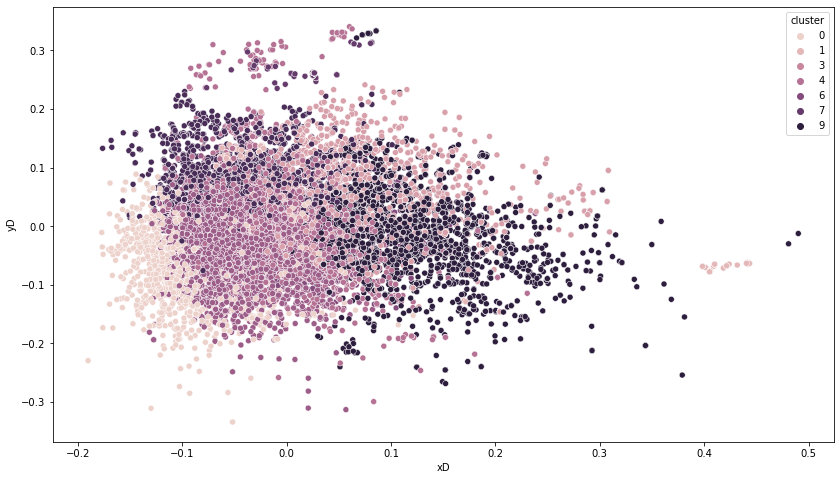

In [24]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster')
plt.show()

In [22]:
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([words[w] for w in np.argsort(r)[-n:]]))

In [23]:
top_words(10)


Cluster 0
measures,excellent,good,signed,tall,quot,cracks,chips,condition,vintage

Cluster 1
thermal,straight,brew,refrigerator,city,oklahoma,heated,rapid,fare,subjected

Cluster 2
capacity,glaze,dishwasher,safe,cups,ml,mug,tea,coffee,cup

Cluster 3
earthenware,healthy,contain,content,ovens,turkey,ecological,germs,material,structure

Cluster 4
wheel,glaze,food,plate,microwave,bowls,dishwasher,quot,safe,bowl

Cluster 5
tall,small,pot,white,unique,glazed,fired,vase,glaze,quot

Cluster 6
durability,food,complete,props,xa,northern,glazes,safe,techniques,california

Cluster 7
safe,match,bespoke,crafted,artistic,days,millilitres,bohon,business,mugs

Cluster 8
unique,order,us,height,safe,packaging,delivery,glaze,days,cm

Cluster 9
food,wheel,holds,mugs,quot,oz,dishwasher,microwave,safe,mug
